##### Let's load the appropriate libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Pre-Processing
###### Let's Load the data

In [4]:
data = pd.read_csv("Dataset/kidney_disease_train.csv")

In [5]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
5,175,60.0,50.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,4200,3.4,yes,no,no,good,no,no,ckd
6,351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,9900,4.7,no,no,no,good,no,no,notckd
7,332,34.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,10500,6.1,no,no,no,good,no,no,notckd
8,167,34.0,70.0,1.020,0.0,0.0,abnormal,normal,notpresent,notpresent,...,42.0,2200,NaN,no,no,no,poor,no,no,ckd
9,245,48.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,19.0,7200,2.6,yes,no,yes,poor,no,no,ckd


In [6]:
data.shape

(280, 26)

Checking if there's any duplicates

In [7]:
data.drop_duplicates()
data.shape

(280, 26)

###### So no duplicates present

In [8]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

##### Checking the data types:

In [9]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Let's check the total number of Chronic kidney disease and not chronic kidney diseases.

In [10]:
data.classification.value_counts()

ckd       174
notckd    106
Name: classification, dtype: int64

Let's draw a graph to see where the values lies:

<AxesSubplot:>

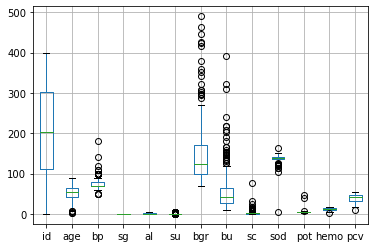

In [11]:
data.boxplot()

In [12]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Let's drop the unnecessary features and check unique values

In [13]:
for i in data.drop("id",axis=1).columns:
    print(f"Unique values in {i}", data[i].unique())

Unique values in age [62. 54. 47. 43. 42. 60. 29. 34. 48. 56. 57. 65. 80. 59. 50. 33. 76. 41.
 49. 67. 68. 23. 52.  8. 46. 45. 35. 17. 70. 71. 39. 64. 26. 72. 21. 61.
 40. 58. 53. 28. 25. 32. 44. 24. 30. nan 20. 75. 69. 63.  4. 74. 73. 14.
 37. 66. 55. 51. 83.  2. 11. 90. 15.  6.  7. 22. 27. 12.  3. 81. 38.]
Unique values in bp [ 70.  80.  60. 100.  50.  90. 110.  nan 120. 140. 180.]
Unique values in sg [1.025   nan 1.015 1.01  1.02  1.005]
Unique values in al [ 3. nan  0.  4.  5.  2.  1.]
Unique values in su [ 0. nan  1.  3.  2.  4.  5.]
Unique values in rbc ['normal' nan 'abnormal']
Unique values in pc ['abnormal' nan 'normal']
Unique values in pcc ['notpresent' 'present' nan]
Unique values in ba ['notpresent' 'present' nan]
Unique values in bgr [122. 233. 114. 108.  nan 261.  83. 139. 103. 132.  98. 215. 140. 241.
  97.  92. 137. 124. 123. 129. 100. 294.  99. 125.  78. 490. 130. 226.
 360.  74. 341.  81. 307.  86. 109. 160. 288. 219. 250. 172. 210.  91.
 201. 112. 105. 131. 425. 252

We can see there are missing values and typos that need to be fixed.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [15]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv
count,280.000000,275.000000,271.000000,244.000000,245.000000,242.000000,247.000000,266.000000,268.000000,213.000000,212.000000,241.000000,229.000000
mean,202.928571,51.454545,76.051661,1.017439,1.024490,0.438017,150.186235,56.983835,3.006157,137.255869,4.754245,12.531535,39.165939
std,111.988168,17.476176,14.256289,0.005746,1.375805,1.073193,77.357144,51.456635,5.850085,11.677123,3.826341,2.882635,8.774388
min,1.000000,2.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,4.500000,2.700000,3.100000,9.000000
25%,110.500000,42.000000,70.000000,1.010000,0.000000,0.000000,100.000000,27.250000,0.900000,135.000000,3.900000,10.500000,33.000000
50%,202.000000,55.000000,70.000000,1.020000,0.000000,0.000000,124.000000,41.000000,1.300000,138.000000,4.400000,12.700000,41.000000
75%,302.250000,65.000000,80.000000,1.020000,2.000000,0.000000,171.500000,64.750000,2.800000,141.000000,4.900000,14.900000,46.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000


# Data Cleaning

Removing all the wrong values like \t etc:

In [16]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [17]:
data.drop(data.columns[data.columns.str.contains('id',case = False)],axis = 1, inplace = True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39.0,7900,3.9,yes,yes,no,good,no,no,yes
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,yes
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,...,NaN,NaN,NaN,yes,no,no,poor,no,no,yes
3,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43.0,7200,5.5,no,no,no,good,no,no,no
4,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,...,39.0,8300,4.6,yes,no,no,poor,no,no,yes


Rename columns to clarify the names and to show full names on plots.

In [18]:
columns_names=['Age (years)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=columns_names

In [19]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39.0,7900,3.9,yes,yes,no,good,no,no,yes
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,yes
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,...,NaN,NaN,NaN,yes,no,no,poor,no,no,yes
3,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43.0,7200,5.5,no,no,no,good,no,no,no
4,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,...,39.0,8300,4.6,yes,no,no,poor,no,no,yes


Let's deal with wrong datatype values now.

In [20]:
for i in data.columns:
    print(f"Unique values in {i}:\n",data[i].unique())

Unique values in Age (years):
 [62. 54. 47. 43. 42. 60. 29. 34. 48. 56. 57. 65. 80. 59. 50. 33. 76. 41.
 49. 67. 68. 23. 52.  8. 46. 45. 35. 17. 70. 71. 39. 64. 26. 72. 21. 61.
 40. 58. 53. 28. 25. 32. 44. 24. 30. nan 20. 75. 69. 63.  4. 74. 73. 14.
 37. 66. 55. 51. 83.  2. 11. 90. 15.  6.  7. 22. 27. 12.  3. 81. 38.]
Unique values in Blood Pressure (mm/Hg):
 [ 70.  80.  60. 100.  50.  90. 110.  nan 120. 140. 180.]
Unique values in Specific Gravity:
 [1.025   nan 1.015 1.01  1.02  1.005]
Unique values in Albumin:
 [ 3. nan  0.  4.  5.  2.  1.]
Unique values in Sugar:
 [ 0. nan  1.  3.  2.  4.  5.]
Unique values in Red Blood Cells:
 ['normal' nan 'abnormal']
Unique values in Pus Cells:
 ['abnormal' nan 'normal']
Unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
Unique values in Bacteria:
 ['notpresent' 'present' nan]
Unique values in Blood Glucose Random (mgs/dL):
 [122. 233. 114. 108.  nan 261.  83. 139. 103. 132.  98. 215. 140. 241.
  97.  92. 137. 124. 123. 129. 100. 29

Some numerical features are mistyped as strings. Let's Solve that.

In [21]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [22]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [23]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[39. nan 43. 40. 44. 42. 19. 45. 24. 41. 31. 48. 34. 32. 33. 36. 52. 46.
 28. 29. 51. 49. 27. 25. 37. 35. 30. 50. 26. 38.  9. 18. 47. 23. 16. 21.
 54. 22. 53. 17.]
[ 7900.    nan  7200.  8300.  4200.  9900. 10500.  2200.  7500.  8400.
 15700.  7000.  4700.  9600.  6700.  9000.  5900.  4300. 12700.  5500.
  5000.  9700.  6900.  9800.  5800.  6400.  8100. 15200.  5600. 14900.
  9100. 26400.  8000.  6500.  9200.  6800. 10800.  4500. 10700. 11000.
  9400.  6300. 10300.  9500.  6200.  6600.  4100.  7700.  5400. 13600.
 11500. 10900. 12200.  8600.  7300.  5200.  7400. 12800.  6000.  9300.
  7800. 10400.  8800. 10200. 16700.  8500. 21600. 12500. 13200.  5100.
 12300. 18900.  5700.  8200. 16300.  4900. 14600.]
[3.9 nan 5.5 4.6 3.4 4.7 6.1 2.6 5.6 3.3 3.8 5.  4.5 5.7 3.5 6.  5.2 4.2
 3.7 5.9 4.9 4.8 3.2 3.  3.6 4.  2.5 4.1 6.2 5.1 6.5 5.8 4.4 5.4 4.3 2.1
 8.  5.3 3.1 2.3 2.9 6.3 6.4 2.4 2.7]


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (years)                     275 non-null    float64
 1   Blood Pressure (mm/Hg)          271 non-null    float64
 2   Specific Gravity                244 non-null    float64
 3   Albumin                         245 non-null    float64
 4   Sugar                           242 non-null    float64
 5   Red Blood Cells                 173 non-null    object 
 6   Pus Cells                       230 non-null    object 
 7   Pus Cell Clumps                 276 non-null    object 
 8   Bacteria                        276 non-null    object 
 9   Blood Glucose Random (mgs/dL)   247 non-null    float64
 10  Blood Urea (mgs/dL)             266 non-null    float64
 11  Serum Creatinine (mgs/dL)       268 non-null    float64
 12  Sodium (mEq/L)                  213 

Now let's replace the Categorical values with numbers. All the Numerical features were already put together in a list named numeric.

In [25]:
numeric

['Age (years)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [26]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39.0,7900.0,3.9,yes,yes,no,good,no,no,yes
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,yes
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,...,NaN,NaN,NaN,yes,no,no,poor,no,no,yes
3,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43.0,7200.0,5.5,no,no,no,good,no,no,no
4,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,...,39.0,8300.0,4.6,yes,no,no,poor,no,no,yes


### Replacing Categorical Values

1. Red Blood Cells

In [27]:
data["Red Blood Cells"].value_counts()

normal      144
abnormal     29
Name: Red Blood Cells, dtype: int64

In [28]:
data['Red Blood Cells'] = data['Red Blood Cells'].replace(to_replace={"normal":0,"abnormal":1})
data['Red Blood Cells'].value_counts()

0.0    144
1.0     29
Name: Red Blood Cells, dtype: int64

2. Pus Cells

In [29]:
data["Pus Cells"].value_counts()

normal      181
abnormal     49
Name: Pus Cells, dtype: int64

In [30]:
data['Pus Cells'] = data['Pus Cells'].replace(to_replace={"normal":0 , "abnormal":1})

In [31]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,notpresent,notpresent,122.0,...,39.0,7900.0,3.9,yes,yes,no,good,no,no,yes
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,yes
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,...,NaN,NaN,NaN,yes,no,no,poor,no,no,yes
3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,notpresent,notpresent,108.0,...,43.0,7200.0,5.5,no,no,no,good,no,no,no
4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,notpresent,present,NaN,...,39.0,8300.0,4.6,yes,no,no,poor,no,no,yes


3. Pus Cell Clumps

In [32]:
data['Pus Cell Clumps'].value_counts()

notpresent    250
present        26
Name: Pus Cell Clumps, dtype: int64

In [33]:
data['Pus Cell Clumps'] = data['Pus Cell Clumps'].replace(to_replace = {'notpresent':0,'present':1})

4. Bacteria

In [34]:
data["Bacteria"].value_counts()

notpresent    260
present        16
Name: Bacteria, dtype: int64

In [35]:
data["Bacteria"]= data["Bacteria"].replace(to_replace = {'notpresent':0,'present':1})

5. Hypertension

In [36]:
data["Hypertension"].value_counts()

no     177
yes    102
Name: Hypertension, dtype: int64

In [37]:
data["Hypertension"] = data["Hypertension"].replace(to_replace = {'yes' : 1, 'no' : 0})

In [38]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,39.0,7900.0,3.9,1.0,yes,no,good,no,no,yes
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,233.0,...,NaN,NaN,NaN,0.0,yes,no,good,no,no,yes
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,114.0,...,NaN,NaN,NaN,1.0,no,no,poor,no,no,yes
3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,43.0,7200.0,5.5,0.0,no,no,good,no,no,no
4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,NaN,...,39.0,8300.0,4.6,1.0,no,no,poor,no,no,yes


6. Diabetes Mellitus

In [39]:
data["Diabetes Mellitus"].value_counts()

no     178
yes    101
Name: Diabetes Mellitus, dtype: int64

In [40]:
data["Diabetes Mellitus"] = data["Diabetes Mellitus"].replace(to_replace={'yes' : 1, 'no' : 0})

7. Coronary Artery Disease

In [41]:
data["Coronary Artery Disease"].value_counts()

no     256
yes     23
Name: Coronary Artery Disease, dtype: int64

In [42]:
data["Coronary Artery Disease"] = data["Coronary Artery Disease"].replace(to_replace = {'yes' : 1, 'no' : 0})

In [43]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,39.0,7900.0,3.9,1.0,1.0,0.0,good,no,no,yes
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,233.0,...,NaN,NaN,NaN,0.0,1.0,0.0,good,no,no,yes
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,114.0,...,NaN,NaN,NaN,1.0,0.0,0.0,poor,no,no,yes
3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,43.0,7200.0,5.5,0.0,0.0,0.0,good,no,no,no
4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,NaN,...,39.0,8300.0,4.6,1.0,0.0,0.0,poor,no,no,yes


8. Appetite

In [44]:
data["Appetite"].unique()

array(['good', 'poor'], dtype=object)

In [45]:
data["Appetite"] = data["Appetite"].replace(to_replace={'good':1,'poor':0})

9. Pedal Edema

In [46]:
data["Pedal Edema"].value_counts()

no     229
yes     51
Name: Pedal Edema, dtype: int64

In [47]:
data["Pedal Edema"] = data["Pedal Edema"].replace(to_replace = {'yes' : 1, 'no' : 0})

10. Anemia

In [48]:
data["Anemia"].value_counts()

no     240
yes     40
Name: Anemia, dtype: int64

In [49]:
data["Anemia"] = data["Anemia"].replace(to_replace = {'yes' : 1, 'no' : 0})

11. Chronic Kidney Disease 

In [50]:
data["Chronic Kidney Disease"].value_counts()

yes    174
no     106
Name: Chronic Kidney Disease, dtype: int64

In [51]:
data["Chronic Kidney Disease"] = [1 if i == "yes" else 0 for i in data["Chronic Kidney Disease"]]

In [52]:
data.head(10)

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,39.0,7900.0,3.9,1.0,1.0,0.0,1,0,0,1
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,233.0,...,NaN,NaN,NaN,0.0,1.0,0.0,1,0,0,1
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,114.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,43.0,7200.0,5.5,0.0,0.0,0.0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,NaN,...,39.0,8300.0,4.6,1.0,0.0,0.0,0,0,0,1
5,60.0,50.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,261.0,...,NaN,4200.0,3.4,1.0,0.0,0.0,1,0,0,1
6,29.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,83.0,...,40.0,9900.0,4.7,0.0,0.0,0.0,1,0,0,0
7,34.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,44.0,10500.0,6.1,0.0,0.0,0.0,1,0,0,0
8,34.0,70.0,1.020,0.0,0.0,1.0,0.0,0.0,0.0,139.0,...,42.0,2200.0,NaN,0.0,0.0,0.0,0,0,0,1
9,48.0,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,103.0,...,19.0,7200.0,2.6,1.0,0.0,1.0,0,0,0,1


In [53]:
data.dtypes

Age (years)                       float64
Blood Pressure (mm/Hg)            float64
Specific Gravity                  float64
Albumin                           float64
Sugar                             float64
Red Blood Cells                   float64
Pus Cells                         float64
Pus Cell Clumps                   float64
Bacteria                          float64
Blood Glucose Random (mgs/dL)     float64
Blood Urea (mgs/dL)               float64
Serum Creatinine (mgs/dL)         float64
Sodium (mEq/L)                    float64
Potassium (mEq/L)                 float64
Hemoglobin (gms)                  float64
Packed Cell Volume                float64
White Blood Cells (cells/cmm)     float64
Red Blood Cells (millions/cmm)    float64
Hypertension                      float64
Diabetes Mellitus                 float64
Coronary Artery Disease           float64
Appetite                            int64
Pedal Edema                         int64
Anemia                            

In [54]:
data.describe()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
count,275.000000,271.000000,244.000000,245.000000,242.000000,173.000000,230.000000,276.000000,276.000000,247.000000,...,229.000000,202.000000,186.000000,279.000000,279.000000,279.000000,280.000000,280.000000,280.000000,280.000000
mean,51.454545,76.051661,1.017439,1.024490,0.438017,0.167630,0.213043,0.094203,0.057971,150.186235,...,39.165939,8344.059406,4.706452,0.365591,0.362007,0.082437,0.778571,0.182143,0.142857,0.621429
std,17.476176,14.256289,0.005746,1.375805,1.073193,0.374622,0.410351,0.292641,0.234113,77.357144,...,8.774388,3110.820364,1.029280,0.482461,0.481444,0.275524,0.415952,0.386653,0.350554,0.485899
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,33.000000,6300.000000,3.925000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,70.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,...,41.000000,7900.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.500000,...,46.000000,9800.000000,5.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Cheaking Missing (NaN) Values:

In [55]:
data.isnull().sum()

Age (years)                         5
Blood Pressure (mm/Hg)              9
Specific Gravity                   36
Albumin                            35
Sugar                              38
Red Blood Cells                   107
Pus Cells                          50
Pus Cell Clumps                     4
Bacteria                            4
Blood Glucose Random (mgs/dL)      33
Blood Urea (mgs/dL)                14
Serum Creatinine (mgs/dL)          12
Sodium (mEq/L)                     67
Potassium (mEq/L)                  68
Hemoglobin (gms)                   39
Packed Cell Volume                 51
White Blood Cells (cells/cmm)      78
Red Blood Cells (millions/cmm)     94
Hypertension                        1
Diabetes Mellitus                   1
Coronary Artery Disease             1
Appetite                            0
Pedal Edema                         0
Anemia                              0
Chronic Kidney Disease              0
dtype: int64

##### Now filling the Null values

To fill the null values we'll fill with the **Median** value of each column:

In [56]:
data.columns

Index(['Age (years)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease'],
      dtype='object')

In [57]:
features = ['Age (years)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia']

In [58]:
for feature in features:
    data[feature] = data[feature].fillna(data[feature].median())

In [59]:
data.isnull().any().sum()

0

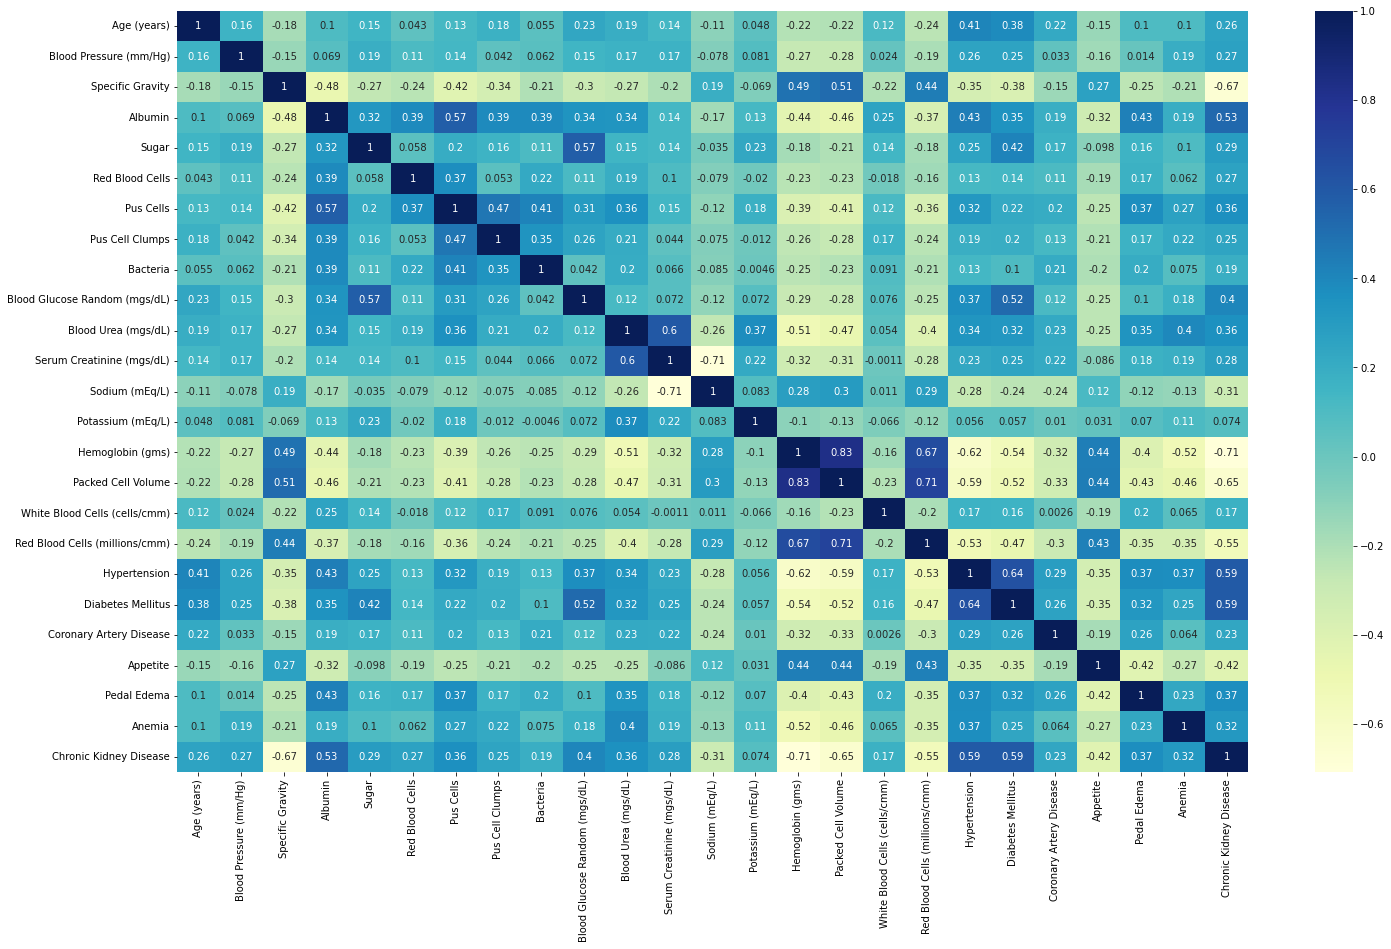

In [60]:
plt.figure(figsize=(24,14))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [61]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,39.0,7900.0,3.9,1.0,1.0,0.0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,233.0,...,41.0,7900.0,4.8,0.0,1.0,0.0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,41.0,7900.0,4.8,1.0,0.0,0.0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,43.0,7200.0,5.5,0.0,0.0,0.0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,124.0,...,39.0,8300.0,4.6,1.0,0.0,0.0,0,0,0,1


### Let's see our Target feature:

c:\Users\mtayy\.conda\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chronic Kidney Disease', ylabel='count'>

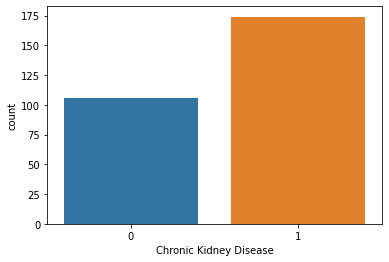

In [62]:
sns.countplot(data['Chronic Kidney Disease'])

In [63]:
data.to_csv("CleanedData/Cleaned_dataset.csv")